In [43]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.integrate
from mpl_toolkits.mplot3d import Axes3D

# Problem 1

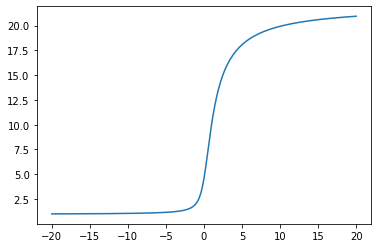

In [3]:
'''
RK4 integrator 
'''
nb_pts = 201
x = np.linspace(-20, 20, nb_pts)
h = np.median(np.diff(x))
y_neg20 = 1
y = np.zeros(len(x))
y[0] = y_neg20


def function(x,y):
    dydx = y/(1+ x**2)
    return dydx

def rk4_step(fun, x, y, h):
    k1=fun(x,y)*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    return y+dy

for i in range(len(x)-1):
        y[i+1]=rk4_step(function,x[i],y[i],h)
plt.clf();
plt.plot(x,y)
plt.show()
    

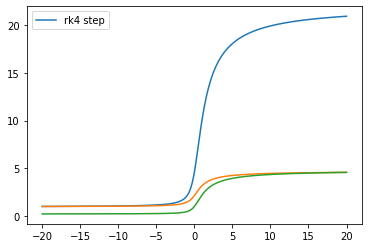

Error for rk4_stepd: 0.36219195552065353
Error for rk4_step:  7.020917836828572


In [30]:
h1 = h/2
def rk4_stepd(fun,x,y, h):
    k1=fun(x,y)*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    return y+dy

truth = np.exp(np.arctan(x))

y2 = np.zeros(len(x))
y2[0] = y_neg20

for i in range(len(x)-1):
        y2[i+1]=rk4_stepd(function,x[i],y2[i],h1)

plt.clf();
plt.plot(x,y, label = 'rk4 step')
plt.plot(x, y2)
plt.plot(x, np.exp(np.arctan(x)))
plt.legend()
plt.show()       
print('Error for rk4_stepd:', np.std(truth-y2[:]))
print('Error for rk4_step: ', np.std(truth - y[:]))

# Problem 2

## a)

52


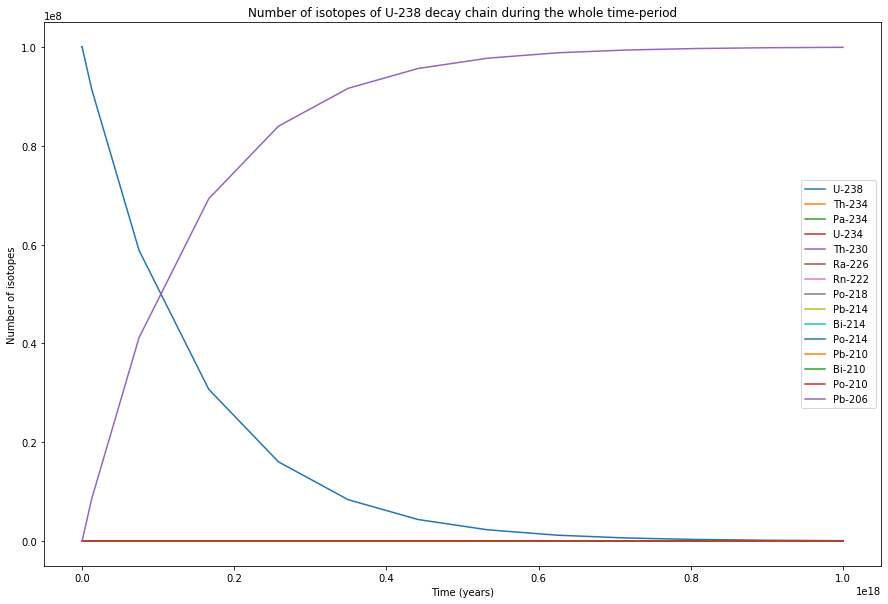

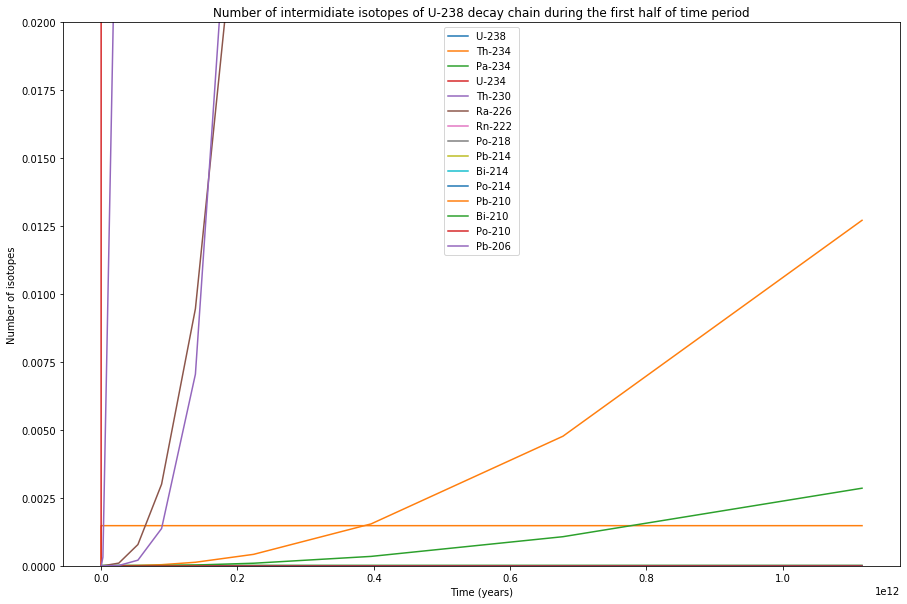

In [30]:
# half-lives of products of Uranium decay chain (in seconds)
T_half = np.array(([1.41*10**17, 2082240, 24120, 7.74*10**12, 2.38*10**12,5.05*10**10, 330350.4, 
                  186, 1608, 1194, 164.3*10*(-3), 7.033*10**8, 1.58*10**8, 1.2*10*10]))

isotopes = ['U-238', 'Th-234', 'Pa-234', 'U-234', 'Th-230', 'Ra-226', 'Rn-222', 'Po-218', 'Pb-214', 
           'Bi-214', 'Po-214', 'Pb-210', 'Bi-210', 'Po-210', 'Pb-206']

T_half_n = T_half/(365 * 24 * 60 * 60 ) # decay times in years
N_0 = 100000000 #Number of u-238 isotopes 

N = np.zeros(len(T_half)+1)
N[0] = N_0

t_i = 0 #beggining of time interval (years)
t_f = 10**18# end of time interval 



# taken from Sievers code and made into loop to create a system of ODEs for the whole decay chain
# of U238
def fun(x, y, half_life = T_half):
    dydx = np.zeros(len(T_half_n) +1)
    for i in range(len(dydx) ):
        if i == 0: # for U-238
            dydx[i] = -y[i]/half_life[i]
            
        elif i > 0 and i < (len(dydx) -1): # for isotopes between u-238 and pb-206
            dydx[i] = y[i-1]/half_life[i-1] - y[i]/half_life[i]
            
        else: 
            
            dydx[i] = y[i-1]/half_life[i-1] # for Pb206
    
    return dydx



ans_stiff = scipy.integrate.solve_ivp(fun, [t_i, t_f], N, method = 'Radau')


plt.figure(figsize = (15, 10))

for i in range(len(T_half) +1):
    plt.plot(ans_stiff.t, ans_stiff.y[i, :], label = f'{isotopes[i]} ')
plt.title('Number of isotopes of U-238 decay chain during the whole time-period')
plt.ylabel('Number of isotopes')
plt.xlabel('Time (years)')
plt.legend()

print(len(ans_stiff.t))


# for isotopes between u-238 and pb-206 since their numbers were negligible 
plt.figure(figsize = (15, 10))
plt.ylim(top = 0.02)
for i in range(len(T_half) +1):
    plt.plot(ans_stiff.t[0:25], ans_stiff.y[i, 0:25], label = f'{isotopes[i]} ')
plt.title('Number of intermidiate isotopes of U-238 decay chain during the first half of time period')
plt.ylabel('Number of isotopes')
plt.xlabel('Time (years)')
plt.legend()

## b)

In [24]:
# U-238:
ans_stiff.y[0 , 20:30]

array([99999901.89182904, 99999841.39000036, 99999719.10165527,
       99999519.46638238, 99999208.27227859, 99998734.63257474,
       99998032.22167538, 99997014.54853788, 99995561.39395902,
       99993456.62710749])

In [25]:
# Pb-206:
ans_stiff.y[-1 ,20:30]

array([7.04972379e-03, 3.86244510e-02, 2.64746483e-01, 1.47208587e+00,
       6.75616870e+00, 2.65952294e+01, 9.10953437e+01, 2.73340615e+02,
       7.24551850e+02, 1.73658192e+03])

[1.38332589e+11 2.23640277e+11 3.96067222e+11 6.77554029e+11
 1.11634051e+12 1.78417936e+12 2.77459474e+12 4.20954940e+12
 6.25857342e+12 9.22645764e+12]


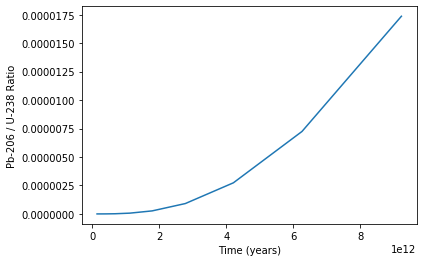

In [26]:
y = []
for i in range(len(ans_stiff.y[-1 ,20:30])):
    y.append(ans_stiff.y[-1 ,20+i] / ans_stiff.y[0 ,20+ i])

    
plt.plot(ans_stiff.t[20:30], y)
plt.ylabel('Pb-206 / U-238 Ratio')
plt.xlabel('Time (years)')

print(ans_stiff.t[20:30])

Yes, it make sense since the decay rate of U-238 is  $$ d = e^{-\frac{t}{T}}$$  and formation rate of Pb-206 is $$f = 1 - e^{-\frac{t}{T_2}}$$. So the ratio between the two is proportional to $$g = \frac{1-e^x}{e^{-x}} = e^{-x} -1 $$

In [31]:
# U-234
ans_stiff.y[3 ,:]

array([0.00000000e+00, 4.72778509e-20, 6.29088883e-17, 6.44564379e-14,
       6.28326457e-11, 4.85369305e-08, 6.61578108e-06, 9.72938338e-05,
       6.99484557e-04, 1.88910337e-03, 3.80404910e-03, 6.71548368e-03,
       1.14303609e-02, 2.08135333e-02, 5.02317647e-02, 2.16267429e-01,
       1.86921538e+00, 1.83713417e+01, 3.81508778e+01, 6.25528968e+01,
       9.72351876e+01, 1.56339013e+02, 2.73830968e+02, 4.60099981e+02,
       7.37279669e+02, 1.13011255e+03, 1.65369994e+03, 2.30276147e+03,
       3.04387932e+03, 3.82264850e+03, 4.57703308e+03, 5.16560838e+03,
       5.37396974e+03, 5.46255420e+03, 5.48434233e+03, 5.48624295e+03,
       5.48420725e+03, 5.47689697e+03, 5.43329524e+03, 5.01591812e+03,
       3.22910944e+03, 1.68599984e+03, 8.80303222e+02, 4.59628611e+02,
       2.39983741e+02, 1.25301590e+02, 6.54231341e+01, 3.41590755e+01,
       1.78353186e+01, 9.31227163e+00, 4.86217291e+00, 4.56546306e+00])

In [32]:
# Th-230
ans_stiff.y[4 ,:]

array([0.00000000e+00, 4.15121700e-33, 6.07641125e-29, 6.28606796e-25,
       6.16793964e-21, 5.01144036e-17, 5.85994397e-14, 3.48110170e-12,
       7.92385665e-11, 4.22351640e-10, 1.47593914e-09, 4.29770975e-09,
       1.20985978e-08, 3.96569976e-08, 2.30026886e-07, 4.26033257e-06,
       3.18203827e-04, 3.06989159e-02, 1.32189302e-01, 3.54710663e-01,
       8.54823227e-01, 2.19988247e+00, 6.68814855e+00, 1.86111606e+01,
       4.67609788e+01, 1.06469163e+02, 2.18400480e+02, 4.00838348e+02,
       6.56142131e+02, 9.63446921e+02, 1.28510556e+03, 1.54438099e+03,
       1.63685603e+03, 1.67624844e+03, 1.68601058e+03, 1.68699657e+03,
       1.68638618e+03, 1.68413883e+03, 1.67073139e+03, 1.54238846e+03,
       9.92947054e+02, 5.18442809e+02, 2.70692123e+02, 1.41335214e+02,
       7.37946956e+01, 3.85300798e+01, 2.01175307e+01, 1.05038724e+01,
       5.48433783e+00, 2.86351171e+00, 1.49511200e+00, 1.40387409e+00])

Text(0.5, 0, 'Time (years)')

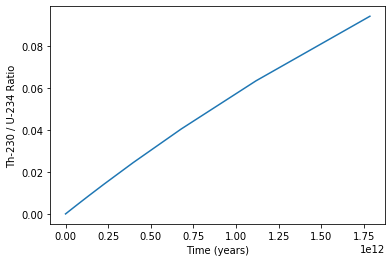

In [33]:
y = []
for i in range(len(ans_stiff.y[4 ,5:26])):
    y.append(ans_stiff.y[4 ,5 + i] / ans_stiff.y[3 ,5 + i])

    
plt.plot(ans_stiff.t[5:26], y)
plt.ylabel('Th-230 / U-234 Ratio')
plt.xlabel('Time (years)')

# Problem 3

## a)


The equation is: $z - z_0 = a((x - x_0)^2 + (y - y_0)^2) $ 


Expanding the formula, moving $z_0$ to the other side: 


z = a(x^2 + y^2 -2x_0x -2y_0y + x_0^2 + y_0^2) + z_0 

Introducing parameters $u_i = x_i x_i$ and $v = y_i y_i$ 

Let the new unknown parameters be defined as: 

b = $-2x_0$; 

c = $-2y_0$; 

d = $x_0^2 + y_0^2$; 

Now, the new equation is: 

z = a(u + v + bx + cy + d) + z_0

P.S. I realized later that the the number of unknown parameters could have been reduced to 4 by creating a constant $f = a*d + z_0$

## b)

In [35]:
data = np.loadtxt("dish_zenith.txt")

In [36]:
x = data[:, 0] 
y = data[:, 1] 
z = data[:, 2] 


u = []
v = []
for i in range(len(data[:, 0])):
    u.append(data[i, 0]**2)
    v.append(data[i, 1]**2)

D = np.zeros([4, len(u)])
D[0, :] = u
D[1, :] = v
D[2, :] = data[:, 0]
D[3, :] = data[:, 1]

def paraboloid( D, a, b, c, d, z0):
    u, v, x, y = D
    return a*(u + v + b*x + c*y + d) + z0

fit =  sp.optimize.curve_fit(paraboloid, xdata = D, ydata = z)
print('a =', fit[0][0], '\n',
     'b =', fit[0][1], '\n',
     'c =', fit[0][2], '\n',
     'd =', fit[0][3], '\n',
     'z_0 =', fit[0][4], '\n',)



a = 0.0001667044547758678 
 b = 2.7209818229796228 
 c = -116.44295223019991 
 d = 18260103.010938063 
 z_0 = -4556.352331688346 



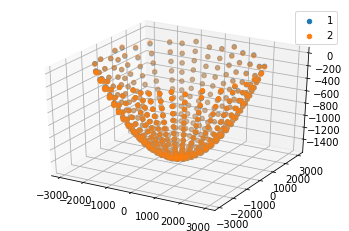

In [44]:

ax = plt.axes(projection='3d')
a, b, c, d, z0 = fit[0]
z1 = paraboloid(D, a, b, c, d, z0)


# Data for three-dimensional scattered points

ax.scatter3D(x, y, z, cmap='Greens', label = '1');
ax.scatter3D(x, y, z1, label = '2' )
ax.legend()





## c)

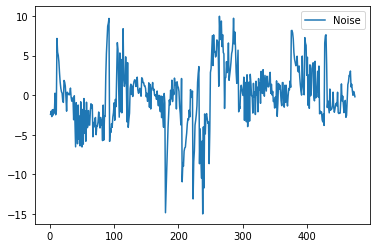

In [45]:
er = z - z1
j = []
for i in range(len(er)):
    j.append(i+1)
plt.plot(j, er, label = 'Noise')
plt.legend()


The dimensions of the symmetrical paraboloidal dish is: 

$4DF = R^2$, where R -- radius of the rim, D -- depth of the paraboloid, and F -- the focus. 



In [46]:
rim = max(z1)
D = np.abs(rim - min(z1))
x0 = b/(-2)
y0 = c/(-2)

print(y0)
R_sq = (max(z1) - z0)/a
print(R_sq)

F = R_sq/(4 * D)
print('Focus :', F )

58.221476115099954
27182769.364591174
Focus : 4570.933909945914
